In [1]:
#https://github.com/NCAR/ctsm_python_gallery/blob/master/notebooks/PFT-Gridding.ipynb
import numpy as np
import xarray as xr

class load_clm:
    def __init__(self, args):
        self.ds = xr.open_dataset(args)
        self.lat = self.ds.lat
        self.lon = self.ds.lon
        self.time = self.ds.time
        self.ixy = self.ds.land1d_ixy
        self.jxy = self.ds.land1d_jxy
        self.ltype = self.ds.land1d_ityplunit
        self.ltype_dict = {value:key for key, value in self.ds.attrs.items() if 'ltype_' in key.lower()} 
    def get2D(self, var_str):
        var = self.ds[var_str]
        nlat = len(self.lat.values)
        nlon = len(self.lon.values)
        ntim = len(self.time.values)
        nltype = len(clm.ltype_dict)
        # create an empty array
        gridded = np.full([ntim,nltype,nlat,nlon],np.nan)
        # assign the values
        gridded[:,
                self.ltype.values.astype(int) - 1, # Fortran arrays start at 1
                self.jxy.values.astype(int) - 1,
                self.ixy.values.astype(int) - 1] = var.values
        grid_dims = xr.DataArray(gridded, dims=("time","ltype","lat","lon"))
        grid_dims = grid_dims.assign_coords(time=self.time,
                                            ltype=[i for i in range(self.ltype.values.min(), 
                                                                    self.ltype.values.max()+1)],
                                            lat=self.lat.values,
                                            lon=self.lon.values)
        grid_dims.name = var_str
        return grid_dims

## load the data use the class

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
fn = "Your_1D_Data.nc"
clm = load_clm(fn)
clm.ltype_dict

{1: 'ltype_vegetated_or_bare_soil',
 2: 'ltype_crop',
 3: 'ltype_UNUSED',
 4: 'ltype_landice_multiple_elevation_classes',
 5: 'ltype_deep_lake',
 6: 'ltype_wetland',
 7: 'ltype_urban_tbd',
 8: 'ltype_urban_hd',
 9: 'ltype_urban_md'}

## plot the figures of different landtype

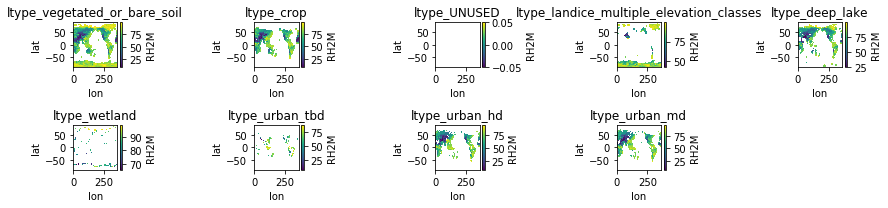

In [3]:
fig = plt.figure(figsize=(12,3))
for i in range(1,10):
    ax = fig.add_subplot(2,5,i)
    clm.get2D("RH2M").sel(ltype=i).plot(ax=ax)
    if i in clm.ltype_dict:
        ax.set_title(clm.ltype_dict[i])
    else:
        ax.set_title("")
plt.tight_layout()
plt.show()